In [74]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/home/aldof/Downloads/ClusterBicluster/Cluster_Bicluster/Cluster 1.csv")

df = df.dropna(subset="Nbre")

for column in df.columns:
    try:
            df[column] = df[column].str.replace('"','')    
            df[column] = df[column].str.replace('"','')
            df[column]= df[column].str.replace(',','.')
            df[column]= df[column].astype(float)
    except:
        continue

df.head(5)


,Nbre,PROV,COMUNI,NLETTI,N_REL_LETTI,N_MUSEI,N_REL_MUSEI,N_TRASPORTI,N_REL_TRASPORTI,LETTI_STR_SANIT,...,Attrattività_totale,Attrattività_totale_(N),MissingAG,MissingAH,MissingAJ,MissingAK,MissingAL,MissingAM,Attrattività_servizi_(2),Attrattività_totale_(2)
0,2.0,1.0,Buseto Palizzolo,257.000,0.001433,1.0,0.002611,9.0,0.000551,0.0,...,0.276083,0.171056,0.081536,0.003932,0.000317,0.008672,0.002855,0.002075,0.014679,-0.083526
1,3.0,1.0,Calatafimi-Segesta,131.000,0.000730,2.0,0.005222,22.0,0.001347,0.0,...,0.271560,0.167800,0.018111,0.000873,0.000277,0.007558,0.003042,0.002210,0.010642,-0.064156
2,7.0,1.0,Custonaci,256.000,0.001427,0.0,0.000000,28.0,0.001714,0.0,...,0.190414,0.109397,0.048605,0.002344,0.000000,0.000000,0.005316,0.003862,0.006207,-0.107702
3,8.0,1.0,Erice,1.121,0.006249,8.0,0.020888,52.0,0.003184,406.0,...,0.386925,0.250833,0.039138,0.001888,0.000279,0.007635,0.001816,0.001319,0.010841,-0.017866
4,9.0,1.0,Favignana,2.879,0.016049,1.0,0.002611,33.0,0.002021,0.0,...,0.924885,0.638023,0.655212,0.031599,0.000228,0.006221,0.007510,0.005457,0.043276,0.245542


In [75]:
## Standardization process
scaler = MinMaxScaler()
columns_to_scale = []
for column in df.columns:
    if(df[column].dtype == float and column != "Nbre" and column != "PROV"):
        columns_to_scale.append(column)

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df.head(5)


,Nbre,PROV,COMUNI,NLETTI,N_REL_LETTI,N_MUSEI,N_REL_MUSEI,N_TRASPORTI,N_REL_TRASPORTI,LETTI_STR_SANIT,...,Attrattività_totale,Attrattività_totale_(N),MissingAG,MissingAH,MissingAJ,MissingAK,MissingAL,MissingAM,Attrattività_servizi_(2),Attrattività_totale_(2)
0,2.0,1.0,Buseto Palizzolo,0.265248,0.041994,0.125,0.125,0.015936,0.015936,0.0,...,0.206352,0.206352,0.057188,0.057188,1.000000,1.000000,0.276920,0.276920,0.178071,0.281007
1,3.0,1.0,Calatafimi-Segesta,0.134672,0.019478,0.250,0.250,0.067729,0.067729,0.0,...,0.202425,0.202425,0.009630,0.009630,0.871559,0.871561,0.305857,0.305857,0.121832,0.323331
2,7.0,1.0,Custonaci,0.264212,0.041816,0.000,0.000,0.091633,0.091634,0.0,...,0.131970,0.131970,0.032495,0.032495,0.000000,0.000000,0.659172,0.659172,0.060050,0.228184
3,8.0,1.0,Erice,0.000076,0.196390,1.000,1.000,0.187251,0.187251,1.0,...,0.302591,0.302591,0.025397,0.025397,0.880385,0.880385,0.115399,0.115399,0.124615,0.424472
4,9.0,1.0,Favignana,0.001898,0.510543,0.125,0.125,0.111554,0.111554,0.0,...,0.769676,0.769676,0.487351,0.487351,0.717341,0.717342,1.000000,1.000000,0.576438,1.000000


In [76]:
columns_to_delete = ["Nbre","PROV"]
for columns in columns_to_delete:
    try:
        df.drop(columns = ["Nbre"], inplace=True)
        df.drop(columns = ["PROV"], inplace=True)
    except:
        continue

df

,COMUNI,NLETTI,N_REL_LETTI,N_MUSEI,N_REL_MUSEI,N_TRASPORTI,N_REL_TRASPORTI,LETTI_STR_SANIT,N.REL_LETTI_STR_SAN,Altri_servizi_pubblici_sociali_e_personali,...,Attrattività_totale,Attrattività_totale_(N),MissingAG,MissingAH,MissingAJ,MissingAK,MissingAL,MissingAM,Attrattività_servizi_(2),Attrattività_totale_(2)
0,Buseto Palizzolo,0.265248,0.041994,0.125,0.125,0.015936,0.015936,0.000000,0.000000,0.000000,...,0.206352,0.206352,0.057188,0.057188,1.000000,1.000000,0.276920,0.276920,0.178071,0.281007
1,Calatafimi-Segesta,0.134672,0.019478,0.250,0.250,0.067729,0.067729,0.000000,0.000000,0.075000,...,0.202425,0.202425,0.009630,0.009630,0.871559,0.871561,0.305857,0.305857,0.121832,0.323331
2,Custonaci,0.264212,0.041816,0.000,0.000,0.091633,0.091634,0.000000,0.000000,0.050000,...,0.131970,0.131970,0.032495,0.032495,0.000000,0.000000,0.659172,0.659172,0.060050,0.228184
3,Erice,0.000076,0.196390,1.000,1.000,0.187251,0.187251,1.000000,1.000000,0.300000,...,0.302591,0.302591,0.025397,0.025397,0.880385,0.880385,0.115399,0.115399,0.124615,0.424472
4,Favignana,0.001898,0.510543,0.125,0.125,0.111554,0.111554,0.000000,0.000000,0.046875,...,0.769676,0.769676,0.487351,0.487351,0.717341,0.717342,1.000000,1.000000,0.576438,1.000000
5,Mazara del Vallo,0.000331,0.240350,0.500,0.500,0.398406,0.398406,0.290640,0.290640,0.521875,...,0.176138,0.176138,0.015978,0.015978,0.245120,0.245120,0.150483,0.150482,0.041719,0.357617
6,Salemi,0.136745,0.019836,0.250,0.250,0.087649,0.087649,0.224138,0.224138,0.115625,...,0.145029,0.145029,0.004913,0.004913,0.560306,0.560306,0.206158,0.206158,0.073509,0.101205
7,San Vito Lo Capo,0.004736,1.000000,0.125,0.125,0.039841,0.039841,0.000000,0.000000,0.046875,...,1.000000,1.000000,1.000000,1.000000,0.751191,0.751192,0.388686,0.388686,1.000000,0.663996
8,Trapani,0.000048,0.191565,0.500,0.500,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.254197,0.254197,0.007663,0.007663,0.178487,0.178488,0.396341,0.396341,0.042239,0.569718
9,Valderice,1.000000,0.168692,0.000,0.000,0.095618,0.095618,0.000000,0.000000,0.093750,...,0.132714,0.132714,0.057057,0.057057,0.000000,0.000000,0.212795,0.212795,0.052972,0.267361


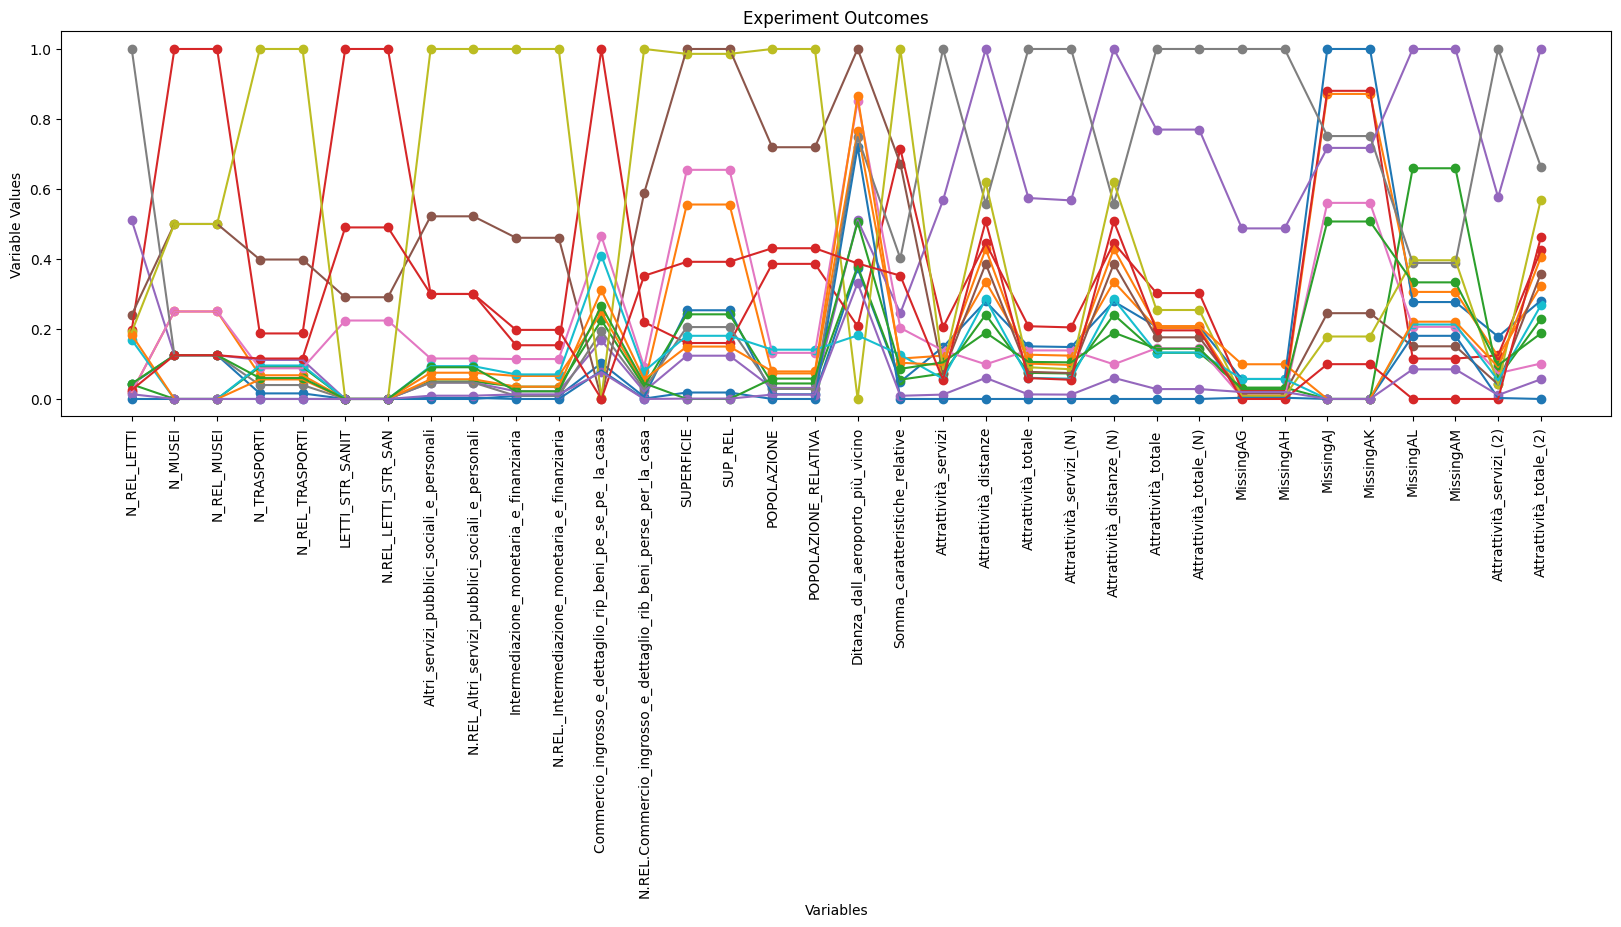

In [68]:
# Plotting the data
## Each row identifies a city; each column identifies a variable
## x-axis represent variables, and y-axis represent variables values

columns_to_delete = ["Nbre","PROV"]
for columns in columns_to_delete:
    try:
        df.drop(columns = ["Nbre"], inplace=True)
        df.drop(columns = ["PROV"], inplace=True)
    except:
        continue


df_transposed = df.set_index('COMUNI')

plt.figure(figsize=(20, 5))



for index, city in df_transposed.iterrows():
    # Use the 'City' column as the label for the plot
    plt.plot(df_transposed.columns[1:], city[1:])
    plt.scatter(df_transposed.columns[1:], city[1:])

# Set plot labels and title
plt.xlabel('Variables')
plt.ylabel('Variable Values')
plt.title('Experiment Outcomes')

# Show the plot
plt.xticks(rotation=90)
plt.show()

In [78]:
df_transposed = df.set_index('COMUNI')
df_transposed

,NLETTI,N_REL_LETTI,N_MUSEI,N_REL_MUSEI,N_TRASPORTI,N_REL_TRASPORTI,LETTI_STR_SANIT,N.REL_LETTI_STR_SAN,Altri_servizi_pubblici_sociali_e_personali,N.REL_Altri_servizi_pubblici_sociali_e_personali,...,Attrattività_totale,Attrattività_totale_(N),MissingAG,MissingAH,MissingAJ,MissingAK,MissingAL,MissingAM,Attrattività_servizi_(2),Attrattività_totale_(2)
COMUNI,,,,,,,,,,,,,,,,,,,,,
Buseto Palizzolo,0.265248,0.041994,0.125,0.125,0.015936,0.015936,0.000000,0.000000,0.000000,0.000000,...,0.206352,0.206352,0.057188,0.057188,1.000000,1.000000,0.276920,0.276920,0.178071,0.281007
Calatafimi-Segesta,0.134672,0.019478,0.250,0.250,0.067729,0.067729,0.000000,0.000000,0.075000,0.075000,...,0.202425,0.202425,0.009630,0.009630,0.871559,0.871561,0.305857,0.305857,0.121832,0.323331
Custonaci,0.264212,0.041816,0.000,0.000,0.091633,0.091634,0.000000,0.000000,0.050000,0.050000,...,0.131970,0.131970,0.032495,0.032495,0.000000,0.000000,0.659172,0.659172,0.060050,0.228184
Erice,0.000076,0.196390,1.000,1.000,0.187251,0.187251,1.000000,1.000000,0.300000,0.300000,...,0.302591,0.302591,0.025397,0.025397,0.880385,0.880385,0.115399,0.115399,0.124615,0.424472
Favignana,0.001898,0.510543,0.125,0.125,0.111554,0.111554,0.000000,0.000000,0.046875,0.046875,...,0.769676,0.769676,0.487351,0.487351,0.717341,0.717342,1.000000,1.000000,0.576438,1.000000
Mazara del Vallo,0.000331,0.240350,0.500,0.500,0.398406,0.398406,0.290640,0.290640,0.521875,0.521875,...,0.176138,0.176138,0.015978,0.015978,0.245120,0.245120,0.150483,0.150482,0.041719,0.357617
Salemi,0.136745,0.019836,0.250,0.250,0.087649,0.087649,0.224138,0.224138,0.115625,0.115625,...,0.145029,0.145029,0.004913,0.004913,0.560306,0.560306,0.206158,0.206158,0.073509,0.101205
San Vito Lo Capo,0.004736,1.000000,0.125,0.125,0.039841,0.039841,0.000000,0.000000,0.046875,0.046875,...,1.000000,1.000000,1.000000,1.000000,0.751191,0.751192,0.388686,0.388686,1.000000,0.663996
Trapani,0.000048,0.191565,0.500,0.500,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.254197,0.254197,0.007663,0.007663,0.178487,0.178488,0.396341,0.396341,0.042239,0.569718
